<a href="https://colab.research.google.com/github/JayRolla/Data-Portfolio/blob/main/salary_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ad870e220fba0af61bc96a909531312ec601015e4f3a36f10bba28e94e81245a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [2]:
pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 63.3 MB/s eta 0:00:00


In [3]:
import re
import pandas as pd
import numpy as np
#import library for checking spelling
from spellchecker import SpellChecker
#import pandas profiling for quick summary of data
import pandas_profiling
#libraries for visualizing the data
import matplotlib.pyplot as plt

import seaborn as sns





<ipython-input-3-baa2b0280804>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
data = pd.read_csv('https://github.com/JayRolla/Data-Portfolio/raw/main/Ask%20A%20Manager%20Salary%20Survey%202021%20(Responses)%20-%20Form%20Responses%201.csv')

In [5]:
data.head(2)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White


In [6]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#df = data.copy()

In [8]:

# rename the columns for ease of analysis
df = data.rename(columns={"How old are you?": "age",
   "What industry do you work in?": "work_industry",
 "If your job title needs additional context, please clarify here:": "job_title_context",
 "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "annual_salary",
 "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": "monetary_compensation_summary",
 "Please indicate the currency": "currency",
 "If your income needs additional context, please provide it here:": "income_additional_context",
 "If \"Other,\" please indicate the currency here: ": "if_other_indicate_currency",
 "What country do you work in?": "work_country",
 "If you're in the U.S., what state do you work in?": "name_of_state_if_in_US",
 "What city do you work in?": "work_city",
 "How many years of professional work experience do you have overall?": "overall_years_pro_work_experience",
 "How many years of professional work experience do you have in your field?": "years_pro_work_experience_in_field",
 "What is your highest level of education completed?": "highest_education",
 "What is your gender?": "gender",
 "What is your race? (Choose all that apply.)": "race"}, inplace=False)

print(df.columns)

Index(['Timestamp', 'age', 'work_industry', 'Job title', 'job_title_context',
       'annual_salary', 'monetary_compensation_summary', 'currency',
       'if_other_indicate_currency', 'income_additional_context',
       'work_country', 'name_of_state_if_in_US', 'work_city',
       'overall_years_pro_work_experience',
       'years_pro_work_experience_in_field', 'highest_education', 'gender',
       'race'],
      dtype='object')


In [9]:
df = df.fillna('N/A')

In [10]:
df.dtypes

Timestamp                             object
age                                   object
work_industry                         object
Job title                             object
job_title_context                     object
annual_salary                         object
monetary_compensation_summary         object
currency                              object
if_other_indicate_currency            object
income_additional_context             object
work_country                          object
name_of_state_if_in_US                object
work_city                             object
overall_years_pro_work_experience     object
years_pro_work_experience_in_field    object
highest_education                     object
gender                                object
race                                  object
dtype: object

In [11]:
# List of columns to convert to numeric
columns_to_convert = ['age', 'annual_salary', 'overall_years_pro_work_experience','years_pro_work_experience_in_field']

# Convert the columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [12]:
df.dtypes

Timestamp                              object
age                                   float64
work_industry                          object
Job title                              object
job_title_context                      object
annual_salary                         float64
monetary_compensation_summary          object
currency                               object
if_other_indicate_currency             object
income_additional_context              object
work_country                           object
name_of_state_if_in_US                 object
work_city                              object
overall_years_pro_work_experience     float64
years_pro_work_experience_in_field    float64
highest_education                      object
gender                                 object
race                                   object
dtype: object

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'Timestamp': ['4/27/2021 11:02:10' '4/27/2021 11:02:22' '4/27/2021 11:02:38' ...
 '4/24/2023 19:45:01' '4/29/2023 15:24:07' '5/9/2023 17:57:30']
Column 'age': [nan]
Column 'work_industry': ['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Hardware Manufacturing'
 'Real Estate / Housing' 'Research / Gov']
Column 'Job title': ['Research and Instruction Librarian'
 'Change & Internal Communications Manager' 'Marketing Specialist' ...
 'Porting Agent' 'Post-doctoral Associate' 'Junior Data Analyst']
Column 'job_title_context': ['N/A' 'High school, FT' 'Data developer/ETL Developer' ...
 'Managing all building projects, renovations and strategic development of property and assets'
 'Port phone numbers from one carrier to another'
 'Research Scientist at NASA']
Column 'annual_salary': [        nan 5.80000e+01 3.50000e+01 ... 5.24160e+04 4.51090e+04
 1.16421e+05]
Column 'monetary_compensation_summary': [0.0 4000.0 'N/A' 3000.0 7000.0 2000.0 10000

In [14]:
spell = SpellChecker()

def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    return ' '.join(corrected_words)

df['work_country'] = df['work_country'].apply(correct_spelling)


In [15]:

# Dictionary of word replacements
replace_dict = {
    'united states': 'United States',
    'unitedstates': 'United States',
    'usa': 'United States',
    'u.s.a.': 'United States',
    'us': 'United States',
    'u.s': 'United States',
    'america': 'United States',
    'united kingdom': 'United Kingdom',
    'uk': 'United Kingdom'
}

# Function to replace words in the text and remove extra white spaces
def replace_words(text):
    for word, replacement in replace_dict.items():
        text = re.sub(r'\b{}\b'.format(re.escape(word)), replacement, text, flags=re.IGNORECASE)

    text = re.sub(r'\s+', ' ', text)  # Remove extra white spaces

    return text.strip()  # Remove leading and trailing white spaces


# Apply word replacements to the 'Text' column
df['work_country'] = df['work_country'].apply(replace_words)


In [16]:
print(df['work_country'].unique())

['United States' 'United Kingdom' 'Canada' 'Scotland' 'The Netherlands'
 'Australia' 'Spain' 'England' 'finland' 'United States of United States'
 'France' 'Germany' 'Ireland' 'India' 'canada' 'ISA' 'Argentina'
 'Great Britain' 'United State' 'Denmark' 'United States.A.' 'Netherlands'
 'netherlands' 'Switzerland' 'Bermuda' 'The United States'
 'United State of United States' 'Malaysia' 'Mexico' 'United Stated'
 'South Africa' 'Belgium' 'Northern Ireland' 'Sweden' 'Hong Kong' 'Kuwait'
 'Norway' 'Sri lana' 'Contracts' 'usage Virgin Islands'
 'England/United Kingdom'
 "We don't get raises we get quarterly bonuses but they periodically asses income in the area you work so I got a raise because a ord party assessment showed I was paid too little for the area we were located"
 'Unites States' 'england United Kingdom' 'Greece' 'Japan' 'up so'
 'Britain' 'Austria' 'Brazil' 'canada Ottawa, ontario' 'Global'
 'United States of American' 'FRANCE' 'United Kingdom england'
 'Worldwide based in Unit

In [17]:
replace_dict = {'Education (Higher Education)': 'education',
                'Computing or Tech':'tech',
                'Accounting, Banking & Finance': 'finance',
                'Real Estate / Housing': 'real estate'}

df['work_industry'] = df['work_industry'].replace(replace_dict)

print(df['work_industry'].unique())

['education' 'tech' 'finance' ... 'Fast food' 'Hardware Manufacturing'
 'Research / Gov']


In [18]:
 replace_dict2 = {'I work for an online state university, managing admissions data. Not direct tech support.':'invalid',
                '0':'invalid',
                'Additonal = Bonus plus stock':'invalid',
                'American Dollars':'invalid',
                'Overtime (about 5 hours a week) and bonus':'invalid',
                '55,000':'invalid',
                'AUD & NZD are not the same currency...':'invalid',
                'AUD and NZD \aren\'t the same currency, and have absolutely nothing to do with each other :(':'invalid',
                '6000 in stock grants annually':'invalid',
                '6000 in stock grants annually':'invalid',
                'Many non-salary benefits - travel, free healthcare for self, very low for family, non-taxable housing allowance ':'invalid',
                'Equity':'invalid',
                'It’s marketed as £22000 but we get paid pro-rats, so no pay for the school holidays.':'invalid',
                'additional compensation is for overtime (i am paid hourly) so it varies. i have included an estimate':'invalid',
                'Converted mine into USD for your easyness':'invalid',
                'Option to get 2x or 1.5x if taking on a weekend day in the summer':'invalid',
                '47000':'invalid'}


df['if_other_indicate_currency'] = df['if_other_indicate_currency'].replace(replace_dict2)



In [19]:
def convert_scientific_notation(value):
    try:
        return "{:.0f}".format(float(value))
    except ValueError:
        return value

# Apply the convert_scientific_notation function to a specific column in a DataFrame
df['monetary_compensation_summary'] = df['monetary_compensation_summary'].apply(convert_scientific_notation)
df['annual_salary'] = df['annual_salary'].apply(convert_scientific_notation)

In [20]:
print(df['monetary_compensation_summary'].head(2))
print(df['annual_salary'].head(2))

0       0
1    4000
Name: monetary_compensation_summary, dtype: object
0    nan
1    nan
Name: annual_salary, dtype: object


In [21]:
# Create an instance of the SpellChecker
#spell = SpellChecker()


# Function to perform spell checking on a text
#def correct_spelling(text):
    #if isinstance(text, float):
        #words = text.split()
    #corrected_words = []
    #for word in words:
        #correction = spell.correction(word)
        #if correction is not None:
            #corrected_words.append(correction)
    #return ' '.join(corrected_words)


# Apply spell checking to the specified columns
#df['income_additional_context'] = df['income_additional_context'].apply(correct_spelling)


In [22]:
#df['name_of_state_if_in_US'] = df['name_of_state_if_in_US'].apply(correct_spelling)



In [23]:
#df['highest_education'] = df['highest_education'].apply(correct_spelling)


In [24]:
#df[['gender', 'race']] = df[['gender', 'race']].applymap(correct_spelling)

In [25]:

plt.show()

In [26]:
def encode_column(df, race):
    encoding_mapping = {}
    code = 1
    unique_values = df['race'].unique()
    for value in unique_values:
        if pd.isnull(value):
            encoding_mapping[value] = 'N/A'
        else:
            encoding_mapping[value] = code
            code += 1
    df['race_code'] = df['race'].map(encoding_mapping)
    return df



In [27]:
df = encode_column(df, 'race')

In [28]:
df.columns

Index(['Timestamp', 'age', 'work_industry', 'Job title', 'job_title_context',
       'annual_salary', 'monetary_compensation_summary', 'currency',
       'if_other_indicate_currency', 'income_additional_context',
       'work_country', 'name_of_state_if_in_US', 'work_city',
       'overall_years_pro_work_experience',
       'years_pro_work_experience_in_field', 'highest_education', 'gender',
       'race', 'race_code'],
      dtype='object')

In [29]:
print(df["race_code"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


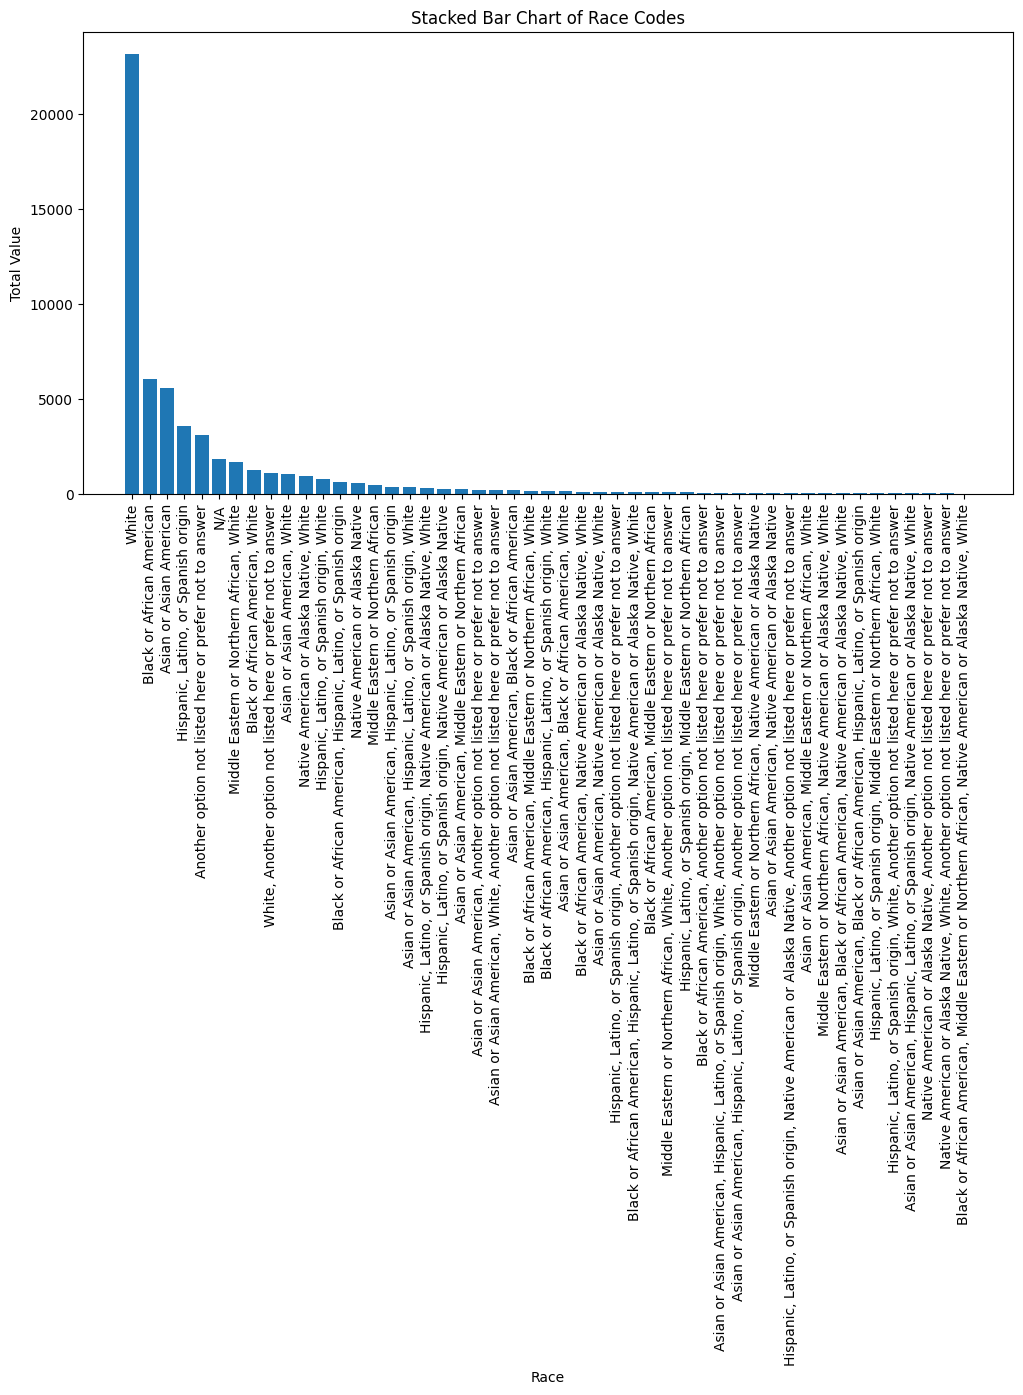

In [30]:
grouped_data = df.groupby('race')['race_code'].sum().sort_values(ascending=False)

# Create a bar plot with stacked bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your requirements
plt.bar(grouped_data.index, grouped_data.values)

# Customize the plot
plt.xlabel('Race')
plt.ylabel('Total Value')
plt.title('Stacked Bar Chart of Race Codes')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

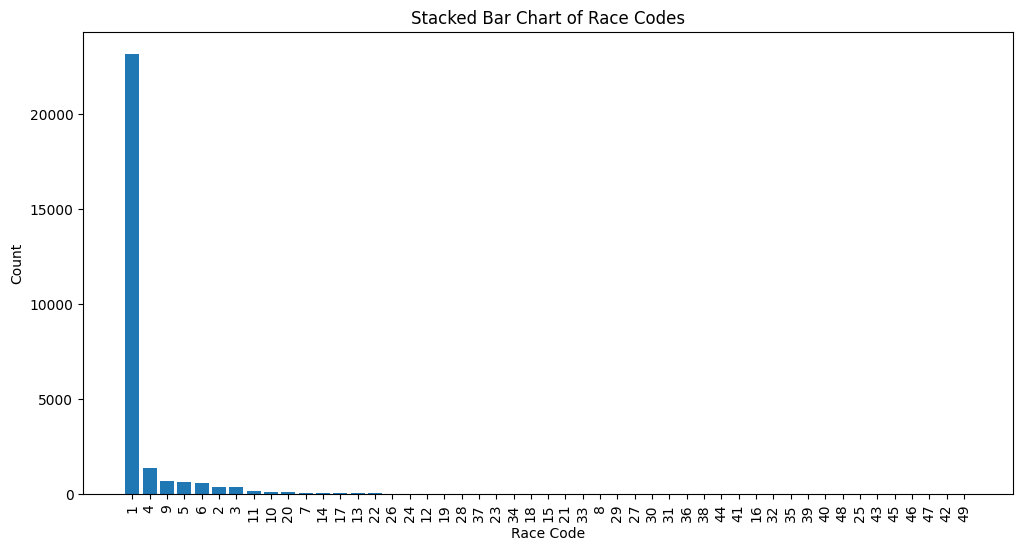

In [31]:
grouped_data = df['race_code'].value_counts().sort_values(ascending=False)

# Create a bar plot with stacked bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your requirements
plt.bar(range(len(grouped_data)), grouped_data.values)

# Customize the plot
plt.xlabel('Race Code')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Race Codes')

# Set x-tick labels to race codes
plt.xticks(range(len(grouped_data)), grouped_data.index)

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [3]:
words = ['Latino', 'Hispanic', 'White', 'Asian', 'African']
# Initialize a dictionary to store the counts
word_counts = {}

# Iterate over the words and count their occurrences
for word in words:
    # Use str.count() to count the occurrences of the word in the column
    count = df['race'].str.count(rf'\b{re.escape(word)}\b', flags=re.IGNORECASE).sum()

    # Store the count in the dictionary
    word_counts[word] = count

# Sort the word counts in descending order based on the count value
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the words and counts for plotting
words = [word for word, _ in sorted_counts]
counts = [count for _, count in sorted_counts]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your requirements
plt.bar(words, counts)

# Customize the plot
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Count of Words in Race Column')

# Print the word counts
for word, count in sorted_counts:
    print(f"{word}: {count}")

NameError: ignored

In [1]:
import plotly.express as px
import plotly.io as pio

In [2]:
px.scatter(df, x="gender", y="annual_salary", animation_frame="age", animation_group="work_industry", title="Examining GDP, Population and Life Expectancy Over Time",
           size="work_country", color="race_code", hover_name="overall_years_pro_work_experience ",
           log_x=True, size_max=55, range_x=[45,150000], range_y=[5,100])

NameError: ignored